# Ada Boost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
#df.isna().sum() # Bu şekilde tamamı görünmezse .sum() da eklenebilir
df.isna().sum().sum()

np.int64(0)

In [13]:
df.describe().transpose()
# sütünü satıra çevir

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


top ; En çok veri.

freq ; Bu veriden kaç tane olduğu.

unique ; Kaç çeşit veri olduğu

In [ ]:
df.describe().T.sort_values(by="unique")
# Unique değerlerine göre sıraladı.

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [15]:
df.iloc[3]

class                       p
cap-shape                   x
cap-surface                 y
cap-color                   w
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  n
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 3, dtype: object

In [17]:
pd.concat({"Eşsiz değer": df.apply(pd.unique), "sayısı": df.nunique()}, axis=1)

# pd.concat() fonksiyonu, verilen veri kümelerini birleştirmek için kullanılır.
# Burada, bir sözlük ({}) içine iki farklı işlem yerleştirilmiştir.

# "Eşsiz değer": df.apply(pd.unique)  
# -> DataFrame'deki her sütunun eşsiz (unique) değerlerini bulur.
# -> pd.unique() fonksiyonu, her sütundaki tekrar eden değerleri çıkarıp,
#    sadece benzersiz olanları bir NumPy dizisi olarak döndürür.
# -> df.apply(pd.unique) ifadesi, her sütun için bu işlemi uygular.

# "sayısı": df.nunique()
# -> df.nunique() fonksiyonu, her sütundaki farklı (benzersiz) değerlerin sayısını bulur.
# -> Yani her sütunda kaç farklı değer olduğunu gösterir.

# axis=1 parametresi, bu iki işlemi sütun bazında birleştirmeyi sağlar.
# -> Eğer axis=0 olsaydı, satır bazında birleştirme yapılırdı.


,Eşsiz değer,sayısı
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


<Axes: xlabel='class', ylabel='count'>

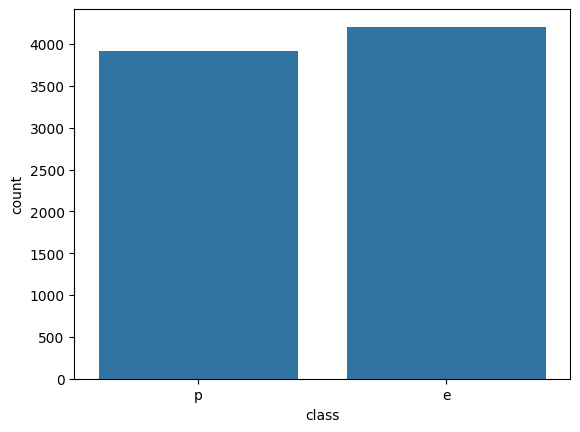

In [18]:
sns.countplot(data=df , x="class")

In [20]:
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

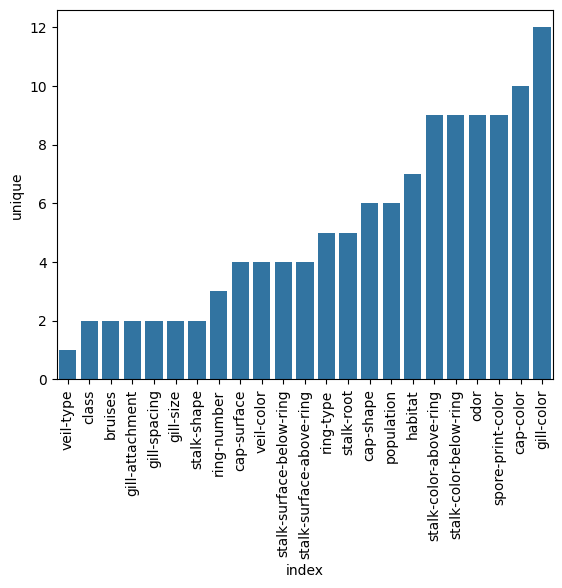

In [24]:
sns.barplot(data=df.describe().transpose().reset_index().sort_values("unique"), x="index", y="unique")
plt.xticks(rotation=90);
# sns.barplot() -> Seaborn kütüphanesinin barplot (çubuk grafik) çizme fonksiyonudur.
# -> Belirtilen veri çerçevesindeki (DataFrame) değerleri kullanarak bir çubuk grafik oluşturur.

# data=df.describe().transpose().reset_index().sort_values("unique")
# -> Grafikte kullanılacak veriyi oluşturur.

# df.describe() 
# -> DataFrame’in istatistiksel özetini çıkarır (count, mean, std, min, max vb.).
# -> Ancak, kategorik sütunlar için bu özet uygun olmayabilir.

# .transpose()
# -> Satırları sütunlara, sütunları satırlara çevirir (döndürür).
# -> df.describe() çıktısını daha okunabilir hale getirir.

# .reset_index()
# -> DataFrame’in index'ini sıfırlar ve mevcut index’i normal bir sütuna dönüştürür.
# -> Böylece "index" sütunu oluşur.

# .sort_values("unique")
# -> DataFrame'i "unique" sütunundaki değerlere göre sıralar (küçükten büyüğe).
# -> Buradaki "unique" sütunu, eşsiz (benzersiz) değerlerin sayısını temsil eder.

# x="index"
# -> X ekseninde, sıfırlanmış index sütunu (yani orijinal sütun isimleri) kullanılır.

# y="unique"
# -> Y ekseninde, her sütundaki benzersiz değerlerin sayısı kullanılır.

# Sonuç:
# -> Bu kod, DataFrame'in her sütunundaki eşsiz (unique) değer sayısını gösteren bir çubuk grafik oluşturur.
# -> Daha az benzersiz değere sahip sütunlar grafikte daha aşağıda yer alırken, fazla benzersiz değere sahip olanlar yukarıda olur.


# Train Test Split

In [25]:
x=df.drop("class" , axis=1)
y= df["class"]

In [26]:
x = pd.get_dummies(x , drop_first=True)

In [27]:
x.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.1, random_state=9)

# Ada Model


In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
model = AdaBoostClassifier(n_estimators=3)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3)

In [34]:
mantar_pred = model.predict(X_test)

# Değerlendirme

In [68]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay ,accuracy_score

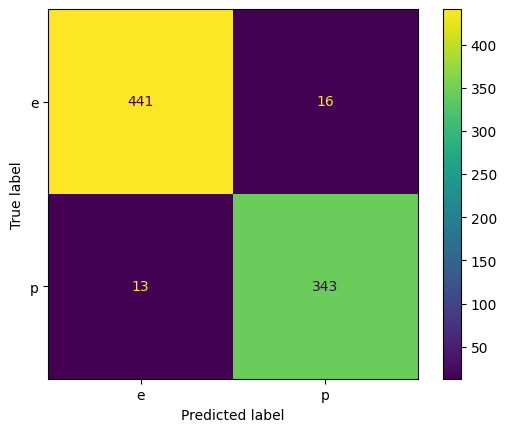

In [69]:
ConfusionMatrixDisplay.from_estimator(model ,X_test,y_test)

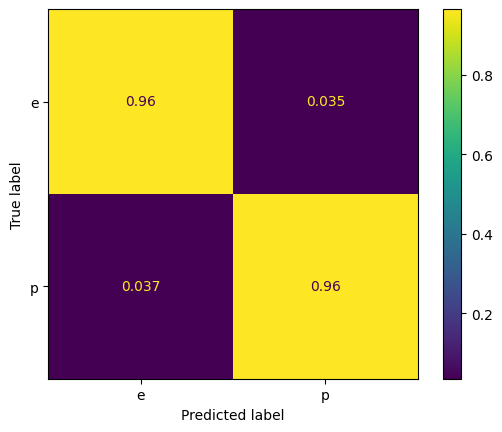

In [70]:
ConfusionMatrixDisplay.from_estimator(model ,X_test,y_test,normalize="true")

In [71]:
print(classification_report(y_test,mantar_pred))

              precision    recall  f1-score   support

           e       0.90      0.95      0.93       457
           p       0.93      0.87      0.90       356

    accuracy                           0.91       813
   macro avg       0.92      0.91      0.91       813
weighted avg       0.91      0.91      0.91       813



# En iyi değeri bulmak

In [43]:
hata_oranı =[]
for mantar_est in range(1,30):
    model = AdaBoostClassifier(n_estimators=mantar_est)
    model.fit(X_train,y_train)
    model_deneme_pred= model.predict(X_test)
    hata = 1-accuracy_score(y_test , model_deneme_pred)
    hata_oranı.append(hata)

2 değer arasındaki fark çoksa sample büyük.

In [46]:
# Eğer veri kümesi çok büyükse ve biz veriyi bölerek işlem yapmak istiyorsak,
# rastgele bir örneklem seçerek işlemi daha verimli hale getirebiliriz.

# Veri kümesinin %5’ini rastgele seçiyoruz
df_sample = df.sample(frac=0.05, random_state=9)

# frac=0.05 -> Veri kümesinin %5'ini örnek olarak alır.
# random_state=9 -> Rastgele seçim işlemini sabitler, böylece her çalıştırmada aynı sonuç elde edilir.

# Seçilen örnek veri kümesinin genel bilgilerini görüntüle
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 4818 to 1674
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     406 non-null    object
 1   cap-shape                 406 non-null    object
 2   cap-surface               406 non-null    object
 3   cap-color                 406 non-null    object
 4   bruises                   406 non-null    object
 5   odor                      406 non-null    object
 6   gill-attachment           406 non-null    object
 7   gill-spacing              406 non-null    object
 8   gill-size                 406 non-null    object
 9   gill-color                406 non-null    object
 10  stalk-shape               406 non-null    object
 11  stalk-root                406 non-null    object
 12  stalk-surface-above-ring  406 non-null    object
 13  stalk-surface-below-ring  406 non-null    object
 14  stalk-color-above-ring    4

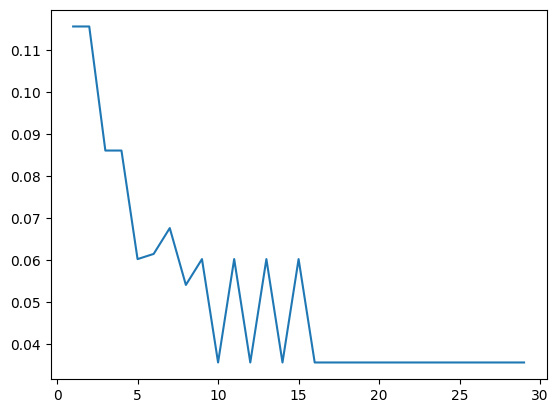

In [72]:
plt.plot(range(1,30) , hata_oranı)

In [ ]:
model.feature_importances_
# İhtiyacım yok diyerek çok büyük bir kısmını sıfarladı.
# Bu kod değil , ada boost bu işlemi sağladı.
# Biz bu kodla yalnızca değerlere bakıyoruz


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0388252 , 0.17817218,
       0.07509623, 0.        , 0.14802856, 0.02693352, 0.        ,
       0.        , 0.        , 0.        , 0.04691752, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05292039, 0.        , 0.04490571, 0.        , 0.02837533,
       0.03333034, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
feature_df = pd.DataFrame(index=x.columns , columns = ["Katsayı"], data= model.feature_importances_ )

In [52]:
feature_df

,Katsayı
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [55]:
# "Katsayı" değeri 0'dan büyük olan satırları filtreliyoruz.
feature_df = feature_df[feature_df["Katsayı"] > 0]

# feature_df içerisindeki verileri "Katsayı" sütununa göre sıralıyoruz (varsayılan olarak küçükten büyüğe).
feature_df = feature_df.sort_values("Katsayı")

# Güncellenmiş DataFrame’i görüntülüyoruz.
feature_df

# Bu işlem, sadece pozitif katsayıları görmek ve bunları sıralı bir şekilde analiz etmek için yapıldı.


,Katsayı
population_c,0.015866
odor_p,0.026934
stalk-root_r,0.028375
stalk-surface-above-ring_k,0.033330
odor_c,0.038825
stalk-root_c,0.044906
gill-size_n,0.046918
stalk-shape_t,0.052920
population_v,0.068818
odor_l,0.075096


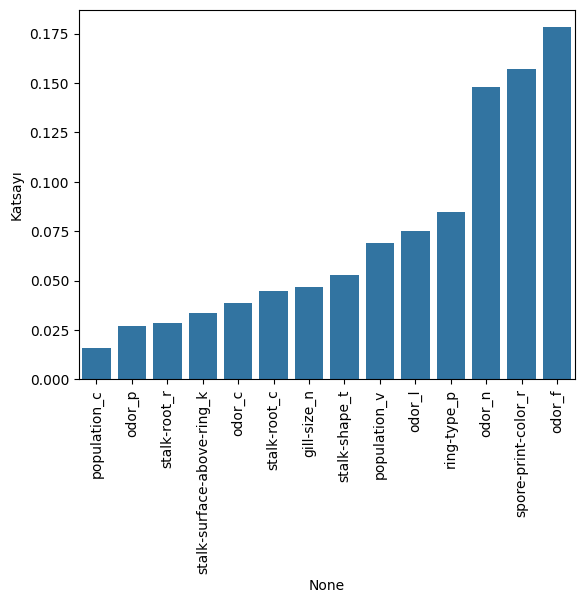

In [58]:
sns.barplot(x=feature_df.index , y="Katsayı" , data=feature_df)
plt.xticks(rotation=90);

<Axes: xlabel='odor', ylabel='count'>

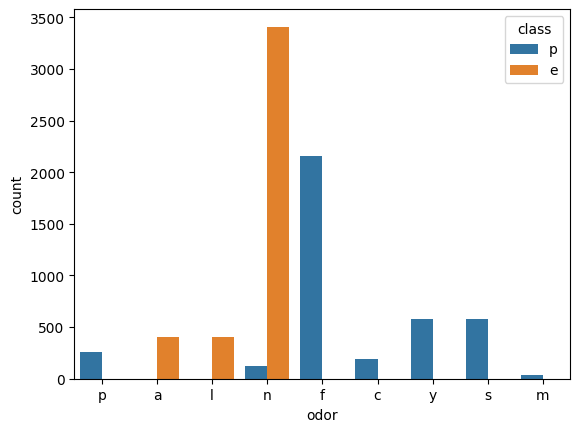

In [59]:
sns.countplot(x="odor" , hue="class" , data=df)

<Axes: xlabel='spore-print-color', ylabel='count'>

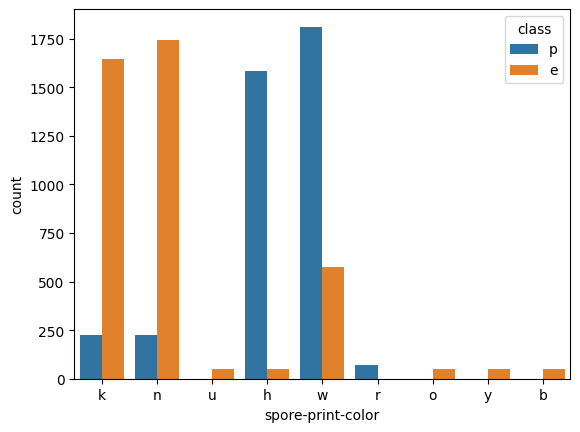

In [61]:
sns.countplot(x="spore-print-color",hue="class",data=df)

# Final Model

In [63]:
final_model = AdaBoostClassifier(n_estimators=18)
final_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [64]:
final_pred=final_model.predict(X_test)

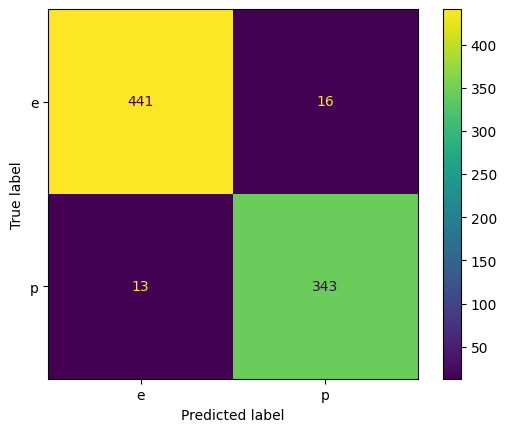

In [65]:
ConfusionMatrixDisplay.from_estimator(final_model,X_test,y_test)

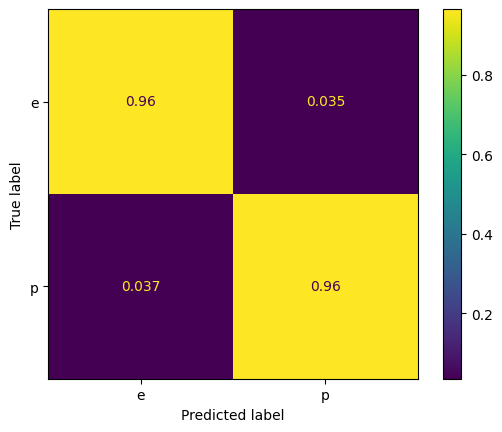

In [66]:
ConfusionMatrixDisplay.from_estimator(final_model,X_test,y_test , normalize="true")

* Estimator sayısı 18 olarak belirlendiğinde grafik yukarıdaki gibi olmuştur

In [67]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           e       0.97      0.96      0.97       457
           p       0.96      0.96      0.96       356

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813

